In [1]:
import pandas as pd

#Milestone1 code still precent, Milestone2 code added below

song_data = pd.read_csv(r"C:\Users\UserA\Desktop\rudarenje\Dataset\song_data.csv", encoding='latin1')

# due to the large amount of data, I ordered it into three datasets which I will each clean and prepare
# after that I will combine the cleaned datasets
# contest_data and country_data do not hold any meaningful variables and will therefore be ignored
# as well as polls datatables
# they are largely empty and their information can be found in the other datasets
# song_data will function as the first dataset which will then be the main / base dataset others are added to

song_data.reset_index(drop=True, inplace=True)

# since there is no year column in the jury, televote and polls datatables I first added them into a dataframe
# with a column of their year and then turned that into a datatable name_data
jury_files = [
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2016_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2017_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2018_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2019_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2021_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2022_jury_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Jury\2023_jury_results.csv"
]
encoding = 'latin1'
jury_data_dict = {}
for year, file_path in zip(range(2016, 2024), jury_files):
    if year != 2020:
        df = pd.read_csv(file_path, encoding=encoding)
        df['year'] = year
        jury_data_dict[year] = df
jury_data = pd.concat(jury_data_dict.values(), ignore_index=True)

# televote
televote_files = [
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2016_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2017_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2018_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2019_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2021_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2022_televote_results.csv",
    r"C:\Users\UserA\Desktop\rudarenje\Dataset\Final Results\Televote\2023_televote_results.csv"
]
encoding = 'latin1'
televote_data_dict = {}
years = range(2016, 2024)
for year, file_path in zip(years, televote_files):
    if year != 2020:
        df = pd.read_csv(file_path, encoding=encoding)
        df['year'] = year
        televote_data_dict[year] = df
televote_data = pd.concat(televote_data_dict.values(), ignore_index=True)

print("Columns in song_data:")
print(song_data.columns)
print("Columns in jury_data:")
print(jury_data.columns)
print("Columns in televote_data:")
print(televote_data.columns)

Columns in song_data:
Index(['year', 'semi_final', 'semi_draw_position', 'final_draw_position',
       'country', 'artist_name', 'song_name', 'language', 'style',
       'direct_qualifier_10', 'gender', 'main_singers', 'age', 'selection',
       'key', 'BPM', 'energy', 'danceability', 'happiness', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'release_date', 'key_change_10', 'backing_dancers', 'backing_singers',
       'backing_instruments', 'instrument_10', 'qualified_10',
       'final_televote_points', 'final_jury_points', 'final_televote_votes',
       'final_jury_votes', 'final_place', 'final_total_points', 'semi_place',
       'semi_televote_points', 'semi_jury_points', 'semi_total_points',
       'favourite_10', 'race', 'host_10'],
      dtype='object')
Columns in jury_data:
Index(['Contestant', 'Total score', 'Jury score', 'Televoting score',
       'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic',
       'Ireland', '

In [2]:
# I am changing song_name into the first column in song_data for easier tracking
# as well as year to second column for jury, televote and polls data

song_name_column = song_data['song_name']
song_data_without_song_name = song_data.drop(columns=['song_name'])
song_data = pd.concat([song_name_column, song_data_without_song_name], axis=1)
print(song_data.columns)

jury_name_column = jury_data['year']
jury_data_without_year = jury_data.drop(columns=['year'])
jury_data = pd.concat([jury_name_column, jury_data_without_year], axis=1)
print(jury_data.columns)

televote_name_column = televote_data['year']
televote_data_without_year = televote_data.drop(columns=['year'])
televote_data = pd.concat([televote_name_column, televote_data_without_year], axis=1)
print(televote_data.columns)

Index(['song_name', 'year', 'semi_final', 'semi_draw_position',
       'final_draw_position', 'country', 'artist_name', 'language', 'style',
       'direct_qualifier_10', 'gender', 'main_singers', 'age', 'selection',
       'key', 'BPM', 'energy', 'danceability', 'happiness', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'release_date', 'key_change_10', 'backing_dancers', 'backing_singers',
       'backing_instruments', 'instrument_10', 'qualified_10',
       'final_televote_points', 'final_jury_points', 'final_televote_votes',
       'final_jury_votes', 'final_place', 'final_total_points', 'semi_place',
       'semi_televote_points', 'semi_jury_points', 'semi_total_points',
       'favourite_10', 'race', 'host_10'],
      dtype='object')
Index(['year', 'Contestant', 'Total score', 'Jury score', 'Televoting score',
       'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic',
       'Ireland', 'Georgia', 'Bosnia and Herzegovina', 

In [3]:
# song_data duplicates
song_data_duplicates = song_data[song_data.duplicated()]
if song_data_duplicates.empty:
    print("No duplicates found")
else:
    print("Duplicate rows:")
    print(song_data_duplicates)
song_data.drop_duplicates(inplace=True)
song_data.reset_index(drop=True, inplace=True)    
print("Song data:")
print(song_data.head())

# jury_data duplicates
jury_duplicates = jury_data[jury_data.duplicated()]
if jury_duplicates.empty:
    print("No duplicates found")
else:
    print("Duplicate rows:")
    print(jury_duplicates)
jury_data.drop_duplicates(inplace=True)
jury_data.reset_index(drop=True, inplace=True)    
print("Jury_data:")
print(jury_data.head())

# televote_data duplicates
televote_duplicates = televote_data[televote_data.duplicated()]
if televote_duplicates.empty:
    print("No duplicates found")
else:
    print("Duplicate rows:")
    print(televote_duplicates)
televote_data.drop_duplicates(inplace=True)
televote_data.reset_index(drop=True, inplace=True)    
print("Televote_data:")
print(televote_data.head())

No duplicates found
Song data:
               song_name                                               year  \
0         Queen of Kings                                               2023   
1  Dance (Our Own Party)                                               2023   
2                    NaN  2023,1,3,5,Serbia,Luke Black,Samo mi se spava,...   
3                   Aija                                               2023   
4             Ai coração                                               2023   

  semi_final semi_draw_position final_draw_position   country    artist_name  \
0          1                  1                  20    Norway     Alessandra   
1          1                  2                 NaN     Malta     The Busker   
2        NaN                NaN                 NaN       NaN            NaN   
3          1                  4                 NaN    Latvia  Sudden Lights   
4          1                  5                   2  Portugal        Mimicat   

     language

In [4]:
# calculate NaN % song_data
song_data_empty = (song_data.isna().sum() / len(song_data)) * 100
print("Song_data:\n", song_data_empty)
print("\n\n")

# calculate NaN % jury_data
jury_data_empty = (jury_data.isna().sum() / len(jury_data)) * 100
print("Jury_data:\n", jury_data_empty)
print("\n\n")

# calculate NaN % televote_data
televote_data_empty = (televote_data.isna().sum() / len(televote_data)) * 100
print("Televote_data:\n", televote_data_empty)

Song_data:
 song_name                11.150442
year                      0.000000
semi_final               11.150442
semi_draw_position       11.150442
final_draw_position      12.920354
country                  11.150442
artist_name              11.150442
language                 11.150442
style                    11.150442
direct_qualifier_10      11.150442
gender                   11.150442
main_singers             11.150442
age                      11.150442
selection                11.150442
key                      11.150442
BPM                      11.150442
energy                   11.150442
danceability             11.150442
happiness                11.150442
loudness                 24.247788
acousticness             11.150442
instrumentalness         11.150442
liveness                 11.150442
speechiness              11.150442
release_date             11.150442
key_change_10            11.150442
backing_dancers          11.150442
backing_singers          11.150442
backing_

In [5]:
# we create a new datatable for easier work flow
# we drop unecessary columns and replace NaN with 0
song_data_cleaned = song_data.copy()
print(song_data_cleaned)
columns_to_drop = ['semi_final', 'semi_draw_position', 'direct_qualifier_10', 'main_singers', 
                   'selection', 'danceability', 'happiness', 'acousticness', 'instrumentalness', 
                   'liveness', 'speechiness', 'backing_dancers', 'backing_singers', 'backing_instruments', 
                   'qualified_10', 'final_total_points', 'semi_total_points', 'host_10', 'semi_place', 
                   'semi_televote_points', 'semi_jury_points', 'race', 'age', 'release_date', 'key_change_10',
                   'instrument_10', 'favourite_10', 'loudness', 'final_draw_position']
song_data_cleaned.drop(columns=columns_to_drop, inplace=True)

columns_to_replace_zero = ['final_televote_points', 'final_jury_points', 'final_televote_votes', 
                           'final_jury_votes', 'final_place' ]
song_data_cleaned[columns_to_replace_zero] = song_data_cleaned[columns_to_replace_zero].fillna(0)

# Confirm NaN percentage in song_data_cleaned
song_data_cleaned_empty = (song_data_cleaned.isna().sum() / len(song_data_cleaned)) * 100
print("Song_data_cleaned:\n", song_data_cleaned_empty)

# Display the cleaned DataFrame
print(song_data_cleaned.head(50))

                    song_name  \
0              Queen of Kings   
1       Dance (Our Own Party)   
2                         NaN   
3                        Aija   
4                  Ai coração   
..                        ...   
560  Et s'il fallait le faire   
561                       NaN   
562       Miss Kiss Kiss Bang   
563              It's My Time   
564                       NaN   

                                                  year semi_final  \
0                                                 2023          1   
1                                                 2023          1   
2    2023,1,3,5,Serbia,Luke Black,Samo mi se spava,...        NaN   
3                                                 2023          1   
4                                                 2023          1   
..                                                 ...        ...   
560                                               2009          -   
561  2009,-,-,10,Russia,Anastasiya Prikhodko,Mamo,"

In [6]:
# we drop all columns with more than 75% empty data
columns_to_drop_jury = ['Bosnia and Herzegovina', 'Russia', 'Macedonia', 'North Macedonia', 'Czechia']
columns_to_drop_televote = ['Bosnia and Herzegovina', 'Russia', 'Macedonia', 'North Macedonia', 'Czechia', 'Rest of the World']
televote_data_cleaned = televote_data.copy()
jury_data_cleaned = jury_data.copy()
televote_data_cleaned.drop(columns=columns_to_drop_televote, inplace=True)
jury_data_cleaned.drop(columns=columns_to_drop_jury, inplace=True)

# we replace all empty data with 0
def replace_nan_with_zero(df):
    return df.fillna(0)

televote_data_cleaned = replace_nan_with_zero(televote_data_cleaned)
jury_data_cleaned = replace_nan_with_zero(jury_data_cleaned)

# Calculate NaN percentage for each cleaned DataFrame
televote_data_empty = (televote_data_cleaned.isna().sum() / len(televote_data_cleaned)) * 100
print("Televote_data_cleaned:\n", televote_data_empty)
print("\n\n")

jury_data_empty = (jury_data_cleaned.isna().sum() / len(jury_data_cleaned)) * 100
print("Jury_data_cleaned:\n", jury_data_empty)

Televote_data_cleaned:
 year                0.0
Contestant          0.0
Total score         0.0
Jury score          0.0
Televoting score    0.0
Austria             0.0
Iceland             0.0
Azerbaijan          0.0
San Marino          0.0
Czech Republic      0.0
Ireland             0.0
Georgia             0.0
Malta               0.0
Spain               0.0
Finland             0.0
Switzerland         0.0
Denmark             0.0
France              0.0
Moldova             0.0
Armenia             0.0
Cyprus              0.0
Bulgaria            0.0
Netherlands         0.0
Latvia              0.0
Israel              0.0
Belarus             0.0
Germany             0.0
Norway              0.0
Australia           0.0
Belgium             0.0
United Kingdom      0.0
Croatia             0.0
Greece              0.0
Lithuania           0.0
Serbia              0.0
Albania             0.0
Estonia             0.0
Ukraine             0.0
Italy               0.0
Poland              0.0
Slovenia        

In [7]:
# we print out the tables again
print("Song_data_cleaned:\n")
print(song_data_cleaned.head(10))
print("\n\n")
print("Televote_data_cleaned:\n")
print(televote_data_cleaned.head(10))
print("\n\n")
print("Jury_data_cleaned:\n")
print(jury_data_cleaned.head(10))
print("\n\n")
print("Polls_data_cleaned:\n")
print(polls_data_cleaned.head(10))

Song_data_cleaned:

               song_name                                               year  \
0         Queen of Kings                                               2023   
1  Dance (Our Own Party)                                               2023   
2                    NaN  2023,1,3,5,Serbia,Luke Black,Samo mi se spava,...   
3                   Aija                                               2023   
4             Ai coração                                               2023   
5             We Are One                                               2023   
6               Mama C!                                               2023   
7               Watergun                                               2023   
8                Unicorn                                               2023   
9        Soarele si luna                                               2023   

       country    artist_name    language        style  gender       key  BPM  \
0       Norway     Alessandra

NameError: name 'polls_data_cleaned' is not defined

In [8]:
print("Columns in song_data_cleaned:")
print(song_data_cleaned.columns)
print("Columns in jury_data_cleaned:")
print(jury_data_cleaned.columns)
print("Columns in televote_data_cleaned:")
print(televote_data_cleaned.columns)

Columns in song_data_cleaned:
Index(['song_name', 'year', 'country', 'artist_name', 'language', 'style',
       'gender', 'key', 'BPM', 'energy', 'final_televote_points',
       'final_jury_points', 'final_televote_votes', 'final_jury_votes',
       'final_place'],
      dtype='object')
Columns in jury_data_cleaned:
Index(['year', 'Contestant', 'Total score', 'Jury score', 'Televoting score',
       'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic',
       'Ireland', 'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland',
       'Denmark', 'France', 'Moldova', 'Armenia', 'Cyprus', 'Bulgaria',
       'Netherlands', 'Latvia', 'Israel', 'Belarus', 'Germany', 'Norway',
       'Australia', 'Belgium', 'United Kingdom', 'Croatia', 'Greece',
       'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 'Italy',
       'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal',
       'Romania'],
      dtype='object')
Columns in televote_data_cleaned:
Index(['year', 'C

In [9]:
# we will merge the two different ways of voting into one datatable as they have mostly the same columns
voting_data = pd.concat([televote_data_cleaned, jury_data_cleaned], ignore_index=True)
voting_data.reset_index(drop=True, inplace=True)
print(voting_data.head(50))

    year      Contestant  Total score  Jury score  Televoting score  Austria  \
0   2016         Belgium          181         130                51      0.0   
1   2016  Czech Republic           41          41                 0      0.0   
2   2016     Netherlands          153         114                39      6.0   
3   2016      Azerbaijan          117          44                73      0.0   
4   2016         Hungary          108          52                56      0.0   
5   2016           Italy          124          90                34      0.0   
6   2016          Israel          135         124                11      0.0   
7   2016        Bulgaria          307         127               180      5.0   
8   2016          Sweden          261         122               139      7.0   
9   2016         Germany           11           1                10      2.0   
10  2016          France          257         148               109      1.0   
11  2016          Poland          229   

In [10]:
print("Columns in song_data_cleaned:")
print(song_data_cleaned.columns)
voting_data.rename(columns={'Contestant': 'country'}, inplace=True)
print("Columns in voting_data:")
print(voting_data.columns)

Columns in song_data_cleaned:
Index(['song_name', 'year', 'country', 'artist_name', 'language', 'style',
       'gender', 'key', 'BPM', 'energy', 'final_televote_points',
       'final_jury_points', 'final_televote_votes', 'final_jury_votes',
       'final_place'],
      dtype='object')
Columns in voting_data:
Index(['year', 'country', 'Total score', 'Jury score', 'Televoting score',
       'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic',
       'Ireland', 'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland',
       'Denmark', 'France', 'Moldova', 'Armenia', 'Cyprus', 'Bulgaria',
       'Netherlands', 'Latvia', 'Israel', 'Belarus', 'Germany', 'Norway',
       'Australia', 'Belgium', 'United Kingdom', 'Croatia', 'Greece',
       'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 'Italy',
       'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal',
       'Romania'],
      dtype='object')


In [11]:
song_data_cleaned['year'] = song_data_cleaned['year'].astype(str)
voting_data['year'] = voting_data['year'].astype(str)
data = pd.merge(song_data_cleaned, voting_data, on=['country', 'year'], how='outer')
data.reset_index(drop=True, inplace=True)
print(data.columns)
print(data.head(50))

Index(['song_name', 'year', 'country', 'artist_name', 'language', 'style',
       'gender', 'key', 'BPM', 'energy', 'final_televote_points',
       'final_jury_points', 'final_televote_votes', 'final_jury_votes',
       'final_place', 'Total score', 'Jury score', 'Televoting score',
       'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic',
       'Ireland', 'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland',
       'Denmark', 'France', 'Moldova', 'Armenia', 'Cyprus', 'Bulgaria',
       'Netherlands', 'Latvia', 'Israel', 'Belarus', 'Germany', 'Norway',
       'Australia', 'Belgium', 'United Kingdom', 'Croatia', 'Greece',
       'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 'Italy',
       'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal',
       'Romania'],
      dtype='object')
                 song_name                                               year  \
0           Queen of Kings                                               2023   
1

In [12]:
data.dropna(subset=['song_name'], inplace=True)
data.drop_duplicates(subset=['song_name'], inplace=True)
data.drop(columns=['Jury score', 'Televoting score'], inplace=True)
data['Total score'] = data['final_televote_points'] + data['final_jury_points']
data.fillna(0.0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape[0])
print(data.columns)
print(data.head(50))

486
Index(['song_name', 'year', 'country', 'artist_name', 'language', 'style',
       'gender', 'key', 'BPM', 'energy', 'final_televote_points',
       'final_jury_points', 'final_televote_votes', 'final_jury_votes',
       'final_place', 'Total score', 'Austria', 'Iceland', 'Azerbaijan',
       'San Marino', 'Czech Republic', 'Ireland', 'Georgia', 'Malta', 'Spain',
       'Finland', 'Switzerland', 'Denmark', 'France', 'Moldova', 'Armenia',
       'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 'Belarus',
       'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom',
       'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia',
       'Ukraine', 'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro',
       'Sweden', 'Portugal', 'Romania'],
      dtype='object')
                  song_name  year          country  \
0            Queen of Kings  2023           Norway   
1     Dance (Our Own Party)  2023            Malta   
2                      Aija  2023     

In [ ]:
pip install mlxtend

In [13]:
#Milestone2 code
#EDA, duplicates and empty data removed, we move on to finding other data points

#Amount of wins per country
import pandas as pd
wins = pd.DataFrame(columns=['country', 'wins'])
for index, row in data.iterrows():
    if row['country'] not in wins['country'].tolist():
        wins.loc[len(wins)] = [row['country'], 0]
for index, row in data.iterrows():
    if row['final_place'] == 1:
        wins.loc[wins['country'] == row['country'], 'wins'] += 1
print("Amount of wins per country: ")
print(wins, "\n\n")

#Frequency of winning per country
total_wins = wins['wins'].sum()
win_frequency = wins.copy()
win_frequency['win_frequency'] = win_frequency['wins'] / total_wins
win_frequency.rename(columns={'wins': 'win_frequency'}, inplace=True)
print("Win frequency per country: ")
print(win_frequency, "\n\n")

#Most points won by winners
winners = data[data['final_place'] == 1]
winners = winners.sort_values(by=['Total score'], ascending=False)
most_points = winners[['country', 'Total score']].copy()
print("Most points win by winners: ")
print(most_points, "\n\n")

#Male to female ratio for performance
gender_counts = data['gender'].value_counts()
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)
if female_count != 0:
    male_to_female_ratio = male_count / female_count
else:
    male_to_female_ratio = float('inf')
print("Male to female ratio for performance:", male_to_female_ratio, "\n\n")

Amount of wins per country: 
                   country  wins
0                   Norway     0
1                    Malta     0
2                   Latvia     0
3                 Portugal     1
4                  Ireland     0
5                  Croatia     0
6              Switzerland     0
7                   Israel     1
8                  Moldova     0
9                   Sweden     3
10              Azerbaijan     1
11         The Netherlands     0
12                 Finland     0
13                 Denmark     1
14                 Estonia     0
15                 Belgium     0
16                  Cyprus     0
17                 Iceland     0
18                  Greece     0
19                  Poland     0
20                Slovenia     0
21                 Georgia     0
22              San Marino     0
23                 Austria     1
24                 Albania     0
25               Lithuania     0
26               Australia     0
27                  France     0
28            

In [ ]:
pip install pandas scikit-learn matplotlib seaborn mlxtend

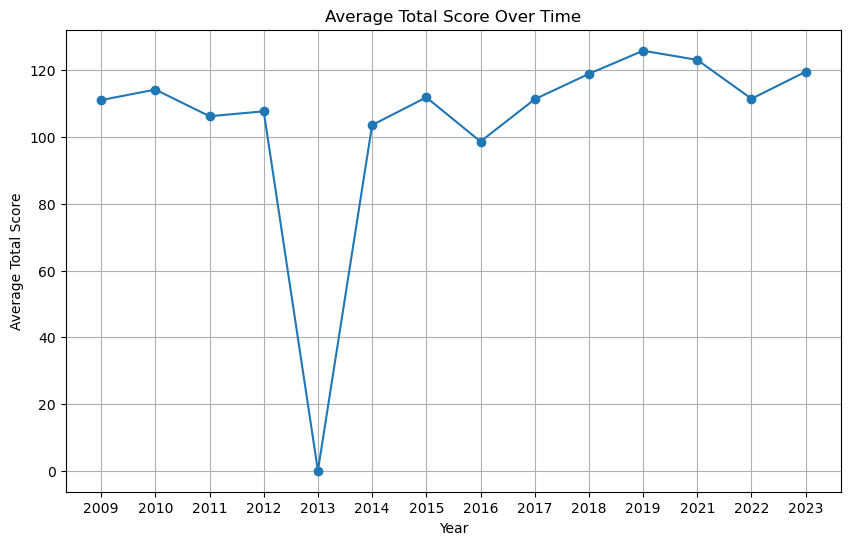

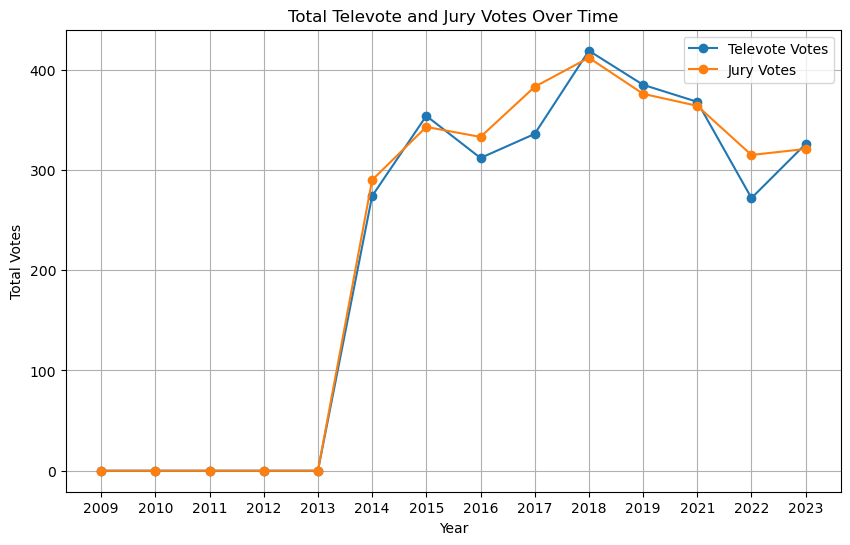

  antecedents consequents  antecedent support  consequent support   support  \
0    (Top 10)       (Pop)            0.242798            0.471193  0.117284   
1       (Pop)    (Top 10)            0.471193            0.242798  0.117284   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.483051  1.025165  0.002879    1.022937       0.032418  
1    0.248908  1.025165  0.002879    1.008135       0.046420  


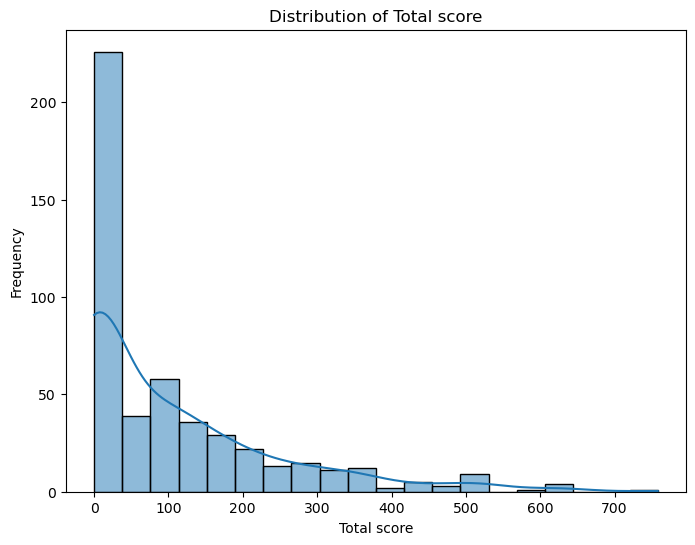

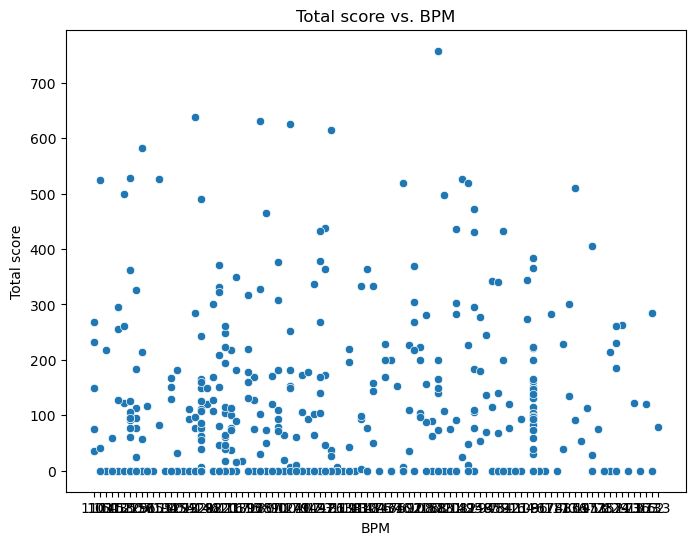

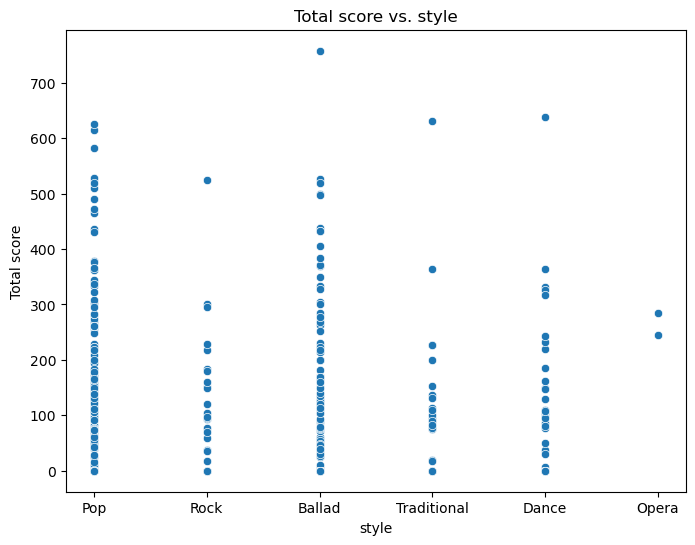

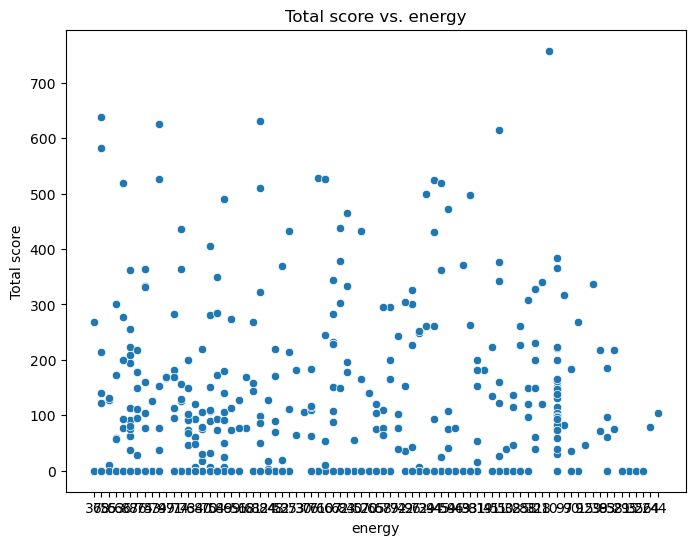

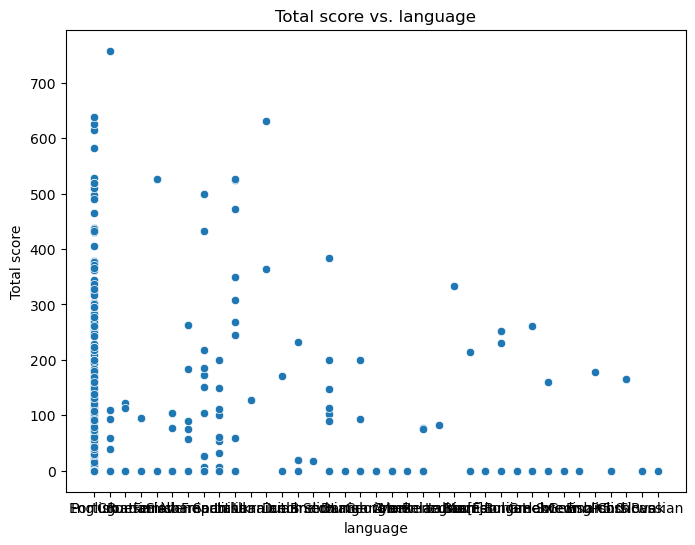

In [14]:
#Plotting points over time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

average_score_by_year = data.groupby('year')['Total score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_score_by_year.index, average_score_by_year.values, marker='o', linestyle='-')
plt.title('Average Total Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
plt.grid(True)
plt.show()

#Plotting number of votes over time
total_televote_votes_by_year = data.groupby('year')['final_televote_votes'].sum()
total_jury_votes_by_year = data.groupby('year')['final_jury_votes'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_televote_votes_by_year.index, total_televote_votes_by_year.values, marker='o', linestyle='-', label='Televote Votes')
plt.plot(total_jury_votes_by_year.index, total_jury_votes_by_year.values, marker='o', linestyle='-', label='Jury Votes')
plt.title('Total Televote and Jury Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend()
plt.grid(True)
plt.show()

#ETL process is not going to be done, as there is no need for it with this dataset

#Apriori algorithm application
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
data['final_place_category'] = pd.cut(data['final_place'], bins=[0, 10, 20, np.inf], labels=['Top 10', 'Top 20', 'Bottom'])
encoded_data = pd.get_dummies(data[['style', 'final_place_category']], prefix='', prefix_sep='')
frequent_itemsets = apriori(encoded_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

#Sequential pattern mining will not be done as it is not fit for this dataset
#Spatial pattern mining will not be done as it is not fit for this dataset
#Graph pattern mining will not be done as it is not fit for this dataset

# Histogram of Total score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Total score'], bins=20, kde=True)
plt.title('Distribution of Total score')
plt.xlabel('Total score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Total score vs BPM
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BPM', y='Total score', data=data)
plt.title('Total score vs. BPM')
plt.show()

# Scatter plot of Total score vs style
plt.figure(figsize=(8, 6))
sns.scatterplot(x='style', y='Total score', data=data)
plt.title('Total score vs. style')
plt.show()

# Scatter plot of Total score vs energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='Total score', data=data)
plt.title('Total score vs. energy')
plt.show()

# Scatter plot of Total score vs language
plt.figure(figsize=(8, 6))
sns.scatterplot(x='language', y='Total score', data=data)
plt.title('Total score vs. language')
plt.show()

In [ ]:
pip install six

In [ ]:
pip install pandas scikit-learn pydotplus

In [15]:
data_ = data['key']
print(data['key'])
for i, x in enumerate(data['key']):
    if "Minor" in x:
        data_[i] = 'Minor'
    else:
        data_[i] = 'Major'
data_

0       E Minor
1       F Minor
2       A Minor
3      Fs Minor
4       D Major
         ...   
481           -
482     F Minor
483     A Major
484    Bb Minor
485     E Major
Name: key, Length: 486, dtype: object


C:\Users\UserA\AppData\Local\Temp\ipykernel_9624\1915842821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[i] = 'Minor'
C:\Users\UserA\AppData\Local\Temp\ipykernel_9624\1915842821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[i] = 'Major'


0      Minor
1      Minor
2      Minor
3      Minor
4      Major
       ...  
481    Major
482    Minor
483    Major
484    Minor
485    Major
Name: key, Length: 486, dtype: object

Accuracy: 0.23972602739726026


[Text(0.8349403638518258, 0.9791666666666666, 'x[6] <= 1.5\ngini = 0.853\nsamples = 340\nvalue = [123, 9, 7, 7, 9, 9, 6, 11, 10, 9, 8, 8, 7, 8\n7, 10, 4, 8, 11, 11, 11, 8, 6, 9, 9, 9, 5, 1]'),
 Text(0.7316784805126404, 0.9375, 'x[13] <= 1.0\ngini = 0.821\nsamples = 304\nvalue = [123, 5, 4, 6, 5, 6, 4, 9, 8, 7, 4, 8, 7, 7\n5, 8, 3, 8, 10, 11, 11, 6, 6, 9, 9, 9, 5, 1]'),
 Text(0.6290872981039326, 0.8958333333333334, 'x[34] <= 1.5\ngini = 0.807\nsamples = 291\nvalue = [123, 5, 4, 5, 5, 5, 4, 8, 8, 7, 4, 8, 6, 6\n5, 8, 3, 7, 8, 10, 11, 6, 6, 9, 9, 6, 4, 1]'),
 Text(0.4772757198033708, 0.8541666666666666, 'x[0] <= 2015.5\ngini = 0.799\nsamples = 284\nvalue = [123, 5, 4, 5, 5, 5, 3, 8, 8, 7, 4, 8, 4, 6\n5, 5, 3, 6, 8, 10, 11, 6, 6, 9, 9, 6, 4, 1]'),
 Text(0.23887377106741572, 0.8125, 'x[1] <= 26.5\ngini = 0.864\nsamples = 160\nvalue = [55, 4, 2, 4, 5, 4, 3, 5, 5, 5, 4, 3, 2, 5\n3, 4, 1, 3, 6, 5, 5, 5, 3, 6, 5, 5, 2, 1]'),
 Text(0.11376404494382023, 0.7708333333333334, 'x[81] <= 0.5\ngini = 0

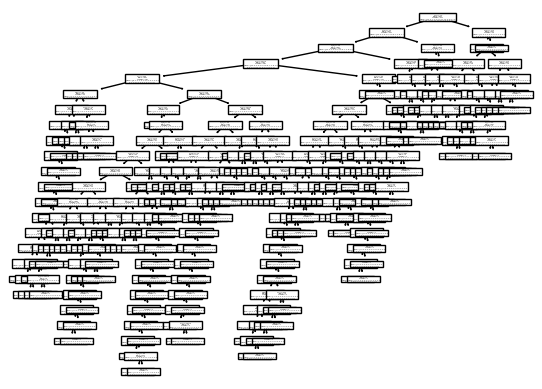

In [16]:
#Milestone3 code
#Decision tree code
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

#Decision tree for final place prediction
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

X = data[['year', 'country', 'language', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['final_place']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender', 'key'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.7123287671232876


[Text(0.9257993653893093, 0.9827586206896551, 'x[78] <= 0.5\ngini = 0.421\nsamples = 340\nvalue = [4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 258, 1, 2, 3\n7, 1, 1, 2, 1, 1, 2, 5, 1, 3, 3, 1, 8, 1\n7, 2, 4, 5, 1, 2]'),
 Text(0.8793697285276489, 0.9482758620689655, 'x[60] <= 0.5\ngini = 0.395\nsamples = 331\nvalue = [4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 257, 1, 2, 3\n7, 1, 1, 2, 1, 1, 2, 5, 1, 3, 3, 1, 0, 1\n7, 2, 4, 5, 1, 2]'),
 Text(0.8281669514278741, 0.9137931034482759, 'x[85] <= 0.5\ngini = 0.369\nsamples = 324\nvalue = [4, 1, 1, 3, 0, 1, 0, 3, 1, 2, 257, 1, 2, 3\n2, 1, 1, 2, 1, 1, 2, 5, 1, 3, 3, 1, 0, 1\n7, 2, 4, 5, 1, 2]'),
 Text(0.8142814525533588, 0.8793103448275862, 'x[82] <= 0.5\ngini = 0.349\nsamples = 319\nvalue = [4, 1, 1, 3, 0, 1, 0, 3, 1, 2, 257, 1, 2, 3\n2, 1, 1, 2, 1, 1, 2, 5, 1, 3, 3, 1, 0, 1\n7, 2, 4, 0, 1, 2]'),
 Text(0.7535323949773547, 0.8448275862068966, 'x[68] <= 0.5\ngini = 0.323\nsamples = 309\nvalue = [4, 1, 1, 3, 0, 1, 0, 3, 1, 2, 254, 1, 2, 3\n2, 1, 1, 2, 1, 1, 2, 5, 1, 3, 3, 

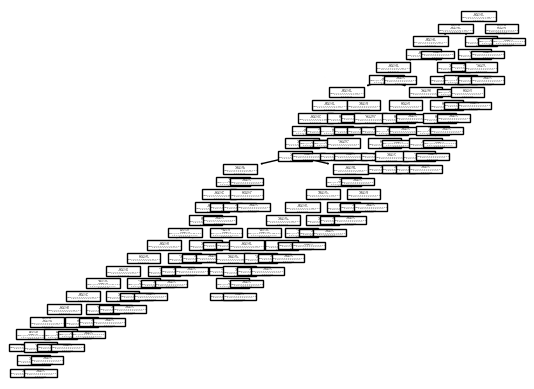

In [17]:
#Decision tree for language prediction
X = data[['year', 'country', 'final_place', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['language']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'style', 'gender', 'key'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.4383561643835616


[Text(0.6070595099183197, 0.975, 'x[3] <= 78.5\ngini = 0.671\nsamples = 340\nvalue = [92, 27, 1, 165, 33, 22]'),
 Text(0.42298716452742124, 0.925, 'x[0] <= 2015.5\ngini = 0.647\nsamples = 243\nvalue = [90, 11, 1, 110, 19, 12]'),
 Text(0.24970828471411902, 0.875, 'x[2] <= 26.5\ngini = 0.668\nsamples = 111\nvalue = [53, 6, 0, 32, 13, 7]'),
 Text(0.16569428238039674, 0.825, 'x[130] <= 0.5\ngini = 0.726\nsamples = 40\nvalue = [12, 2, 0, 15, 7, 4]'),
 Text(0.12135355892648775, 0.775, 'x[1] <= 17.0\ngini = 0.68\nsamples = 27\nvalue = [11, 2, 0, 10, 2, 2]'),
 Text(0.08868144690781797, 0.725, 'x[1] <= 1.5\ngini = 0.621\nsamples = 21\nvalue = [8, 1, 0, 10, 1, 1]'),
 Text(0.07001166861143523, 0.675, 'x[84] <= 0.5\ngini = 0.602\nsamples = 16\nvalue = [8, 0, 0, 6, 1, 1]'),
 Text(0.060676779463243874, 0.625, 'x[83] <= 0.5\ngini = 0.551\nsamples = 15\nvalue = [8, 0, 0, 6, 0, 1]'),
 Text(0.03733955659276546, 0.575, 'x[0] <= 2011.5\ngini = 0.497\nsamples = 13\nvalue = [7, 0, 0, 6, 0, 0]'),
 Text(0.018

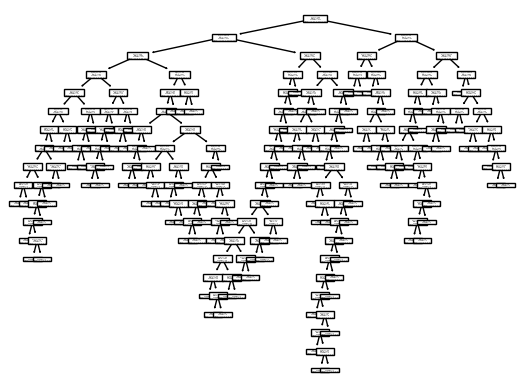

In [18]:
#Decision tree for style prediction
X = data[['year', 'country', 'final_place', 'language', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['style']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'key'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.6301369863013698


[Text(0.5402106629392971, 0.9791666666666666, 'x[3] <= 31.5\ngini = 0.499\nsamples = 340\nvalue = [176, 164]'),
 Text(0.27456070287539935, 0.9375, 'x[2] <= 122.0\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(0.22344249201277955, 0.8958333333333334, 'x[3] <= 20.5\ngini = 0.034\nsamples = 57\nvalue = [56, 1]'),
 Text(0.19788338658146964, 0.8541666666666666, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.24900159744408945, 0.8541666666666666, 'x[1] <= 2.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.22344249201277955, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.27456070287539935, 0.8125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.32567891373801916, 0.8958333333333334, 'x[1] <= 3.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.30011980830670926, 0.8541666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.35123801916932906, 0.8541666666666666, 'x[2] <= 126.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.32567891373801

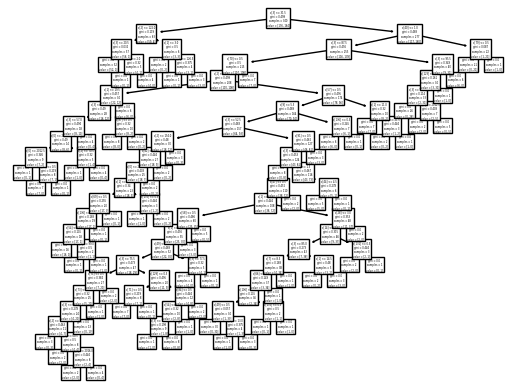

In [19]:
#Decision tree for key prediction
X = data[['year', 'country', 'final_place', 'language', 'gender', 'style', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['key']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'style'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.8904109589041096


[Text(0.47954545454545455, 0.95, 'x[27] <= 0.5\ngini = 0.199\nsamples = 340\nvalue = [304, 4, 4, 4, 2, 4, 3, 5, 2, 3, 5]'),
 Text(0.18181818181818182, 0.85, 'x[5] <= 5.0\ngini = 0.033\nsamples = 304\nvalue = [299, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]'),
 Text(0.10909090909090909, 0.75, 'x[34] <= 10.0\ngini = 0.013\nsamples = 301\nvalue = [299, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.07272727272727272, 0.65, 'x[32] <= 9.0\ngini = 0.007\nsamples = 300\nvalue = [299, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.03636363636363636, 0.55, 'gini = 0.0\nsamples = 298\nvalue = [298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.10909090909090909, 0.55, 'x[22] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.07272727272727272, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.14545454545454545, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.14545454545454545, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0,

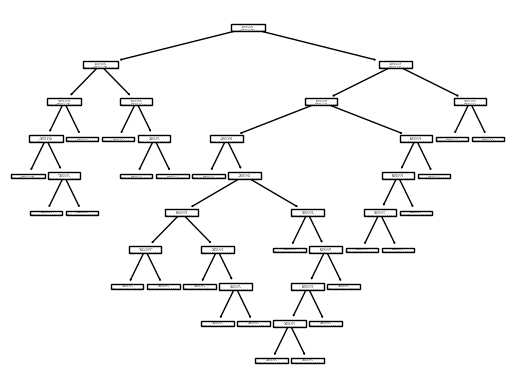

In [20]:
#Decision tree for Germany vote prediction
X = data[['year', 'country', 'final_place', 'language', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'style', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['Germany']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'key', 'style'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.8561643835616438


[Text(0.55, 0.9444444444444444, 'x[12] <= 1.5\ngini = 0.184\nsamples = 340\nvalue = [307, 5, 4, 3, 1, 1, 5, 2, 5, 2, 5]'),
 Text(0.328125, 0.8333333333333334, 'x[5] <= 9.5\ngini = 0.051\nsamples = 306\nvalue = [298, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1]'),
 Text(0.303125, 0.7222222222222222, 'x[20] <= 6.5\ngini = 0.039\nsamples = 304\nvalue = [298, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1]'),
 Text(0.23125, 0.6111111111111112, 'x[14] <= 8.5\ngini = 0.026\nsamples = 302\nvalue = [298, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]'),
 Text(0.1625, 0.5, 'x[30] <= 1.5\ngini = 0.02\nsamples = 299\nvalue = [296, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]'),
 Text(0.1, 0.3888888888888889, 'x[43] <= 2.5\ngini = 0.013\nsamples = 296\nvalue = [294, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.05, 0.2777777777777778, 'x[36] <= 2.5\ngini = 0.007\nsamples = 293\nvalue = [292, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.025, 0.16666666666666666, 'gini = 0.0\nsamples = 290\nvalue = [290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.075, 0.16666666666666666, '

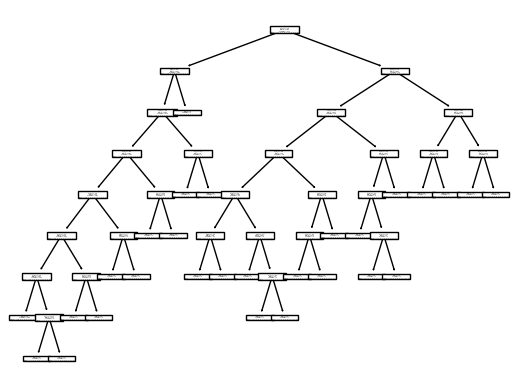

In [21]:
#Decision tree for France vote prediction
X = data[['year', 'country', 'final_place', 'language', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'Germany', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'style', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['France']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'key', 'style'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.8561643835616438


[Text(0.5109649122807017, 0.9545454545454546, 'x[29] <= 1.5\ngini = 0.189\nsamples = 340\nvalue = [306, 6, 1, 3, 6, 4, 4, 2, 3, 2, 3]'),
 Text(0.19298245614035087, 0.8636363636363636, 'x[30] <= 0.5\ngini = 0.039\nsamples = 305\nvalue = [299, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0]'),
 Text(0.07017543859649122, 0.7727272727272727, 'x[38] <= 6.0\ngini = 0.007\nsamples = 295\nvalue = [294, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.03508771929824561, 0.6818181818181818, 'gini = 0.0\nsamples = 293\nvalue = [293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.10526315789473684, 0.6818181818181818, 'x[62] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.07017543859649122, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.14035087719298245, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3157894736842105, 0.7727272727272727, 'x[26] <= 0.5\ngini = 0.68\nsamples = 10\nvalue = [

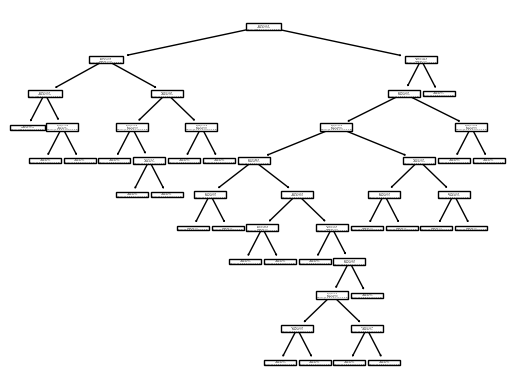

In [22]:
#Decision tree for Serbia vote prediction
X = data[['year', 'country', 'final_place', 'language', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'style', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Germany', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['Serbia']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'key', 'style'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.4657534246575342


[Text(0.84451629784689, 0.9736842105263158, 'x[16] <= 1.5\ngini = 0.584\nsamples = 340\nvalue = [162, 144, 34]'),
 Text(0.7177407296650717, 0.9210526315789473, 'x[135] <= 0.5\ngini = 0.577\nsamples = 303\nvalue = [157, 115, 31]'),
 Text(0.550313995215311, 0.868421052631579, 'x[4] <= 81.5\ngini = 0.569\nsamples = 271\nvalue = [150, 91, 30]'),
 Text(0.3757476076555024, 0.8157894736842105, 'x[0] <= 2015.5\ngini = 0.526\nsamples = 210\nvalue = [128, 65, 17]'),
 Text(0.180622009569378, 0.7631578947368421, 'x[73] <= 0.5\ngini = 0.603\nsamples = 103\nvalue = [50, 39, 14]'),
 Text(0.17105263157894737, 0.7105263157894737, 'x[45] <= 0.5\ngini = 0.601\nsamples = 100\nvalue = [50, 36, 14]'),
 Text(0.16148325358851676, 0.6578947368421053, 'x[0] <= 2010.5\ngini = 0.609\nsamples = 96\nvalue = [46, 36, 14]'),
 Text(0.09569377990430622, 0.6052631578947368, 'x[134] <= 0.5\ngini = 0.622\nsamples = 24\nvalue = [7, 12, 5]'),
 Text(0.07655502392344497, 0.5526315789473685, 'x[1] <= 23.5\ngini = 0.639\nsample

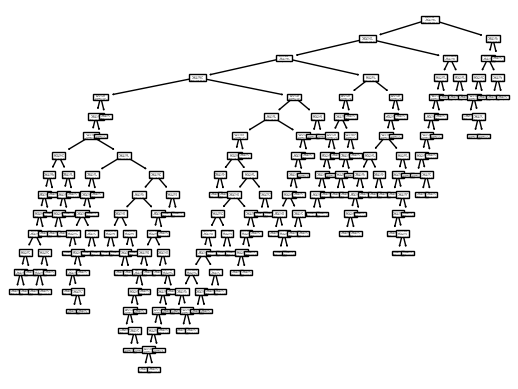

In [23]:
#Decision tree for gender prediction
X = data[['year', 'country', 'final_place', 'language', 'Serbia', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'style', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Germany', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['gender']

#One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'key', 'style'])

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

tree.plot_tree(clf)

Accuracy: 0.0547945205479452
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.11      0.20        54
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         4
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         5
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         3
        16.0       0.00      

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


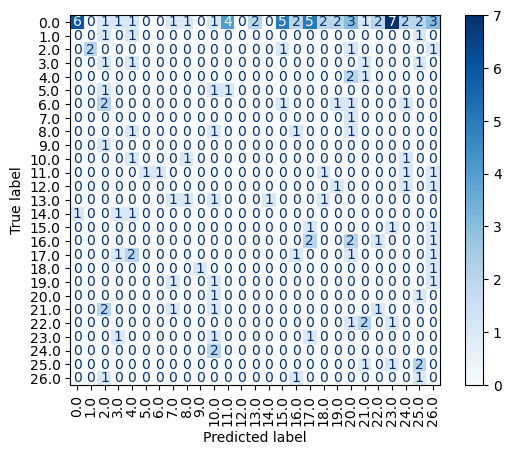

In [24]:
#Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Gaussian Naive Bayes
#Predicting the final place

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['final_place']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.7397260273972602
Classification Report:
              precision    recall  f1-score   support

    Albanian       0.50      0.50      0.50         2
   Bulgarian       0.00      0.00      0.00         2
    Croatian       1.00      0.50      0.67         2
     English       0.79      0.94      0.86       108
    Estonian       0.00      0.00      0.00         1
     Finnish       0.00      0.00      0.00         0
      French       0.29      0.50      0.36         4
    Georgian       0.00      0.00      0.00         1
     German5       0.00      0.00      0.00         1
       Greek       0.00      0.00      0.00         2
      Hebrew       0.00      0.00      0.00         1
   Hungarian       0.00      0.00      0.00         3
   Icelandic       0.00      0.00      0.00         1
     Italian       0.33      0.40      0.36         5
  Italian[f]       0.00      0.00      0.00         1
  Macedonian       0.00      0.00      0.00         1
 Montenegrin       0.00      

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

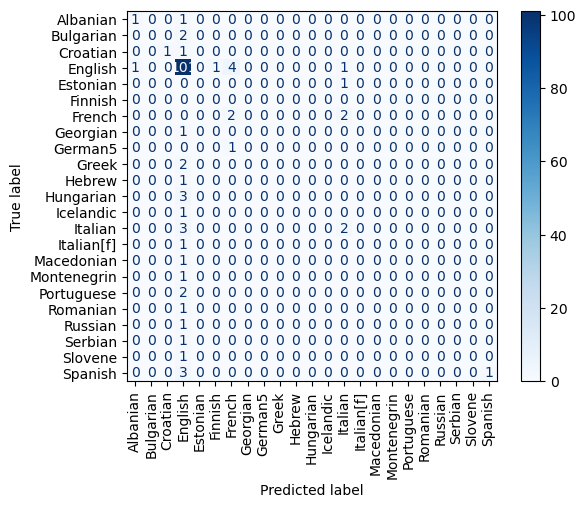

In [25]:
#Gaussian Naive Bayes
#Predicting the language

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'final_place', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['language']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'style', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.1780821917808219
Classification Report:
              precision    recall  f1-score   support

      Ballad       0.22      0.10      0.14        41
       Dance       0.10      0.26      0.15        19
       Opera       0.00      0.00      0.00         1
         Pop       0.46      0.27      0.34        64
        Rock       0.00      0.00      0.00        13
 Traditional       0.00      0.00      0.00         8

    accuracy                           0.18       146
   macro avg       0.13      0.10      0.10       146
weighted avg       0.28      0.18      0.21       146



C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


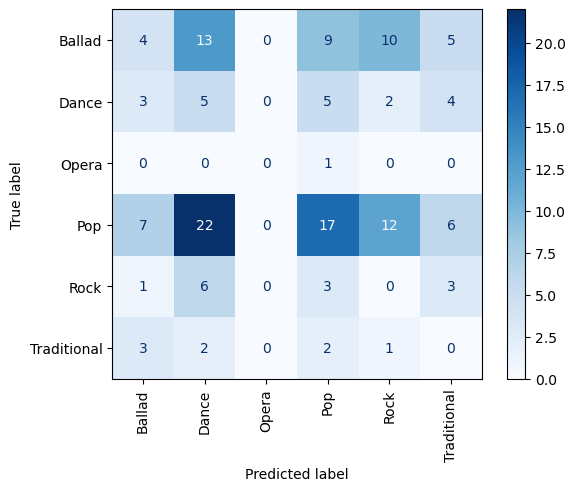

In [26]:
#Gaussian Naive Bayes
#Predicting the style

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'final_place', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['style']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.5616438356164384
Classification Report:
              precision    recall  f1-score   support

       Major       0.60      0.52      0.56        77
       Minor       0.53      0.61      0.57        69

    accuracy                           0.56       146
   macro avg       0.56      0.56      0.56       146
weighted avg       0.57      0.56      0.56       146



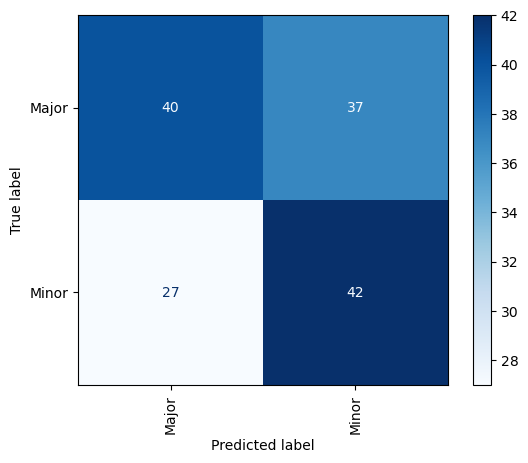

In [27]:
#Gaussian Naive Bayes
#Predicting the key

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'style', 'gender', 'final_place', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['key']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.7465753424657534
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       132
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         1

    accuracy                           0.75       146
   macro avg       0.08      0.08      0.08       146
weighted avg       0.83      0.75      0.79       146



C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

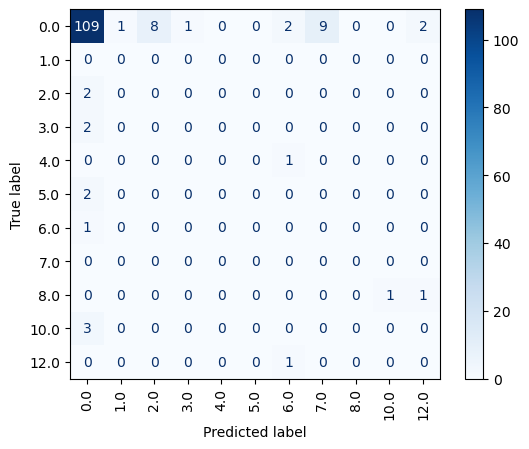

In [28]:
#Gaussian Naive Bayes
#Predicting the Germany vote

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'final_place', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['Germany']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.678082191780822
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       126
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         3
        12.0       0.10      1.00      0.18         1

    accuracy                           0.68       146
   macro avg       0.09      0.16      0.09       146
weighted avg       0.76      0.68      0.71       146



C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

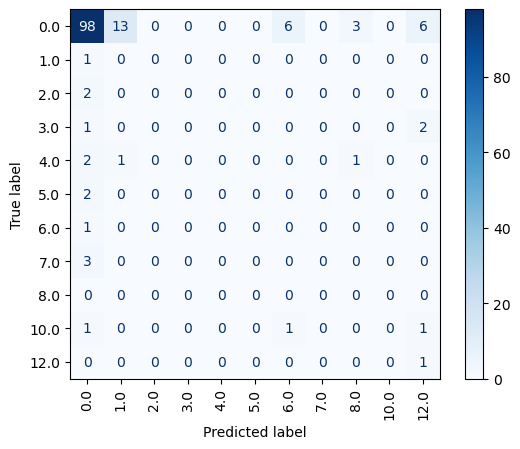

In [29]:
#Gaussian Naive Bayes
#Predicting the France vote

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'final_place', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'Serbia', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['France']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Accuracy: 0.7328767123287672
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       127
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         3

    accuracy                           0.73       146
   macro avg       0.08      0.08      0.08       146
weighted avg       0.75      0.73      0.74       146



C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

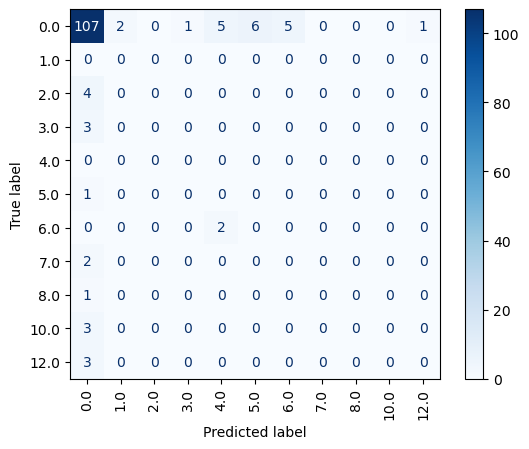

In [30]:
#Gaussian Naive Bayes
#Predicting the Serbia vote

# Replace '-' with NaN and fill missing values
data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Define features and target variable
X = data[['year', 'country', 'language', 'style', 'gender', 'key', 'BPM', 'energy',
          'Austria', 'Iceland', 'Azerbaijan', 'San Marino', 'Czech Republic', 'Ireland', 
          'Georgia', 'Malta', 'Spain', 'Finland', 'Switzerland', 'Denmark', 'France', 
          'Moldova', 'Armenia', 'Cyprus', 'Bulgaria', 'Netherlands', 'Latvia', 'Israel', 
          'Belarus', 'Germany', 'Norway', 'Australia', 'Belgium', 'United Kingdom', 
          'Croatia', 'Greece', 'Lithuania', 'final_place', 'Albania', 'Estonia', 'Ukraine', 
          'Italy', 'Poland', 'Slovenia', 'Hungary', 'Montenegro', 'Sweden', 'Portugal', 
          'Romania']]
y = data['Serbia']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, columns=['country', 'language', 'style', 'gender', 'key'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and y_pred
labels = sorted(list(set(y_test) | set(y_pred)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Accuracy: 0.25925925925925924
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.25      1.00      0.40         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1
        22.0       0.00     

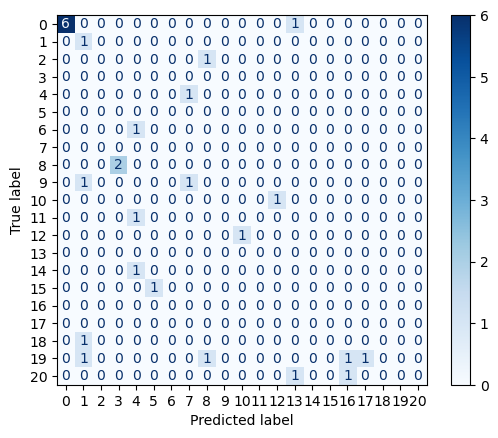

In [31]:
#Gaussian Naive Bayes
#Predicting the likelihood of a song winning with the style ballad

# Filter for ballad songs
ballad_songs = data[data['style'].str.contains('ballad', case=False)]

# Extract features and target variable
X = ballad_songs.drop(columns=['final_place', 'style'])
y = ballad_songs['final_place']

# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Accuracy: 0.3695652173913043
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77        19
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         2
        17.0       0.00      

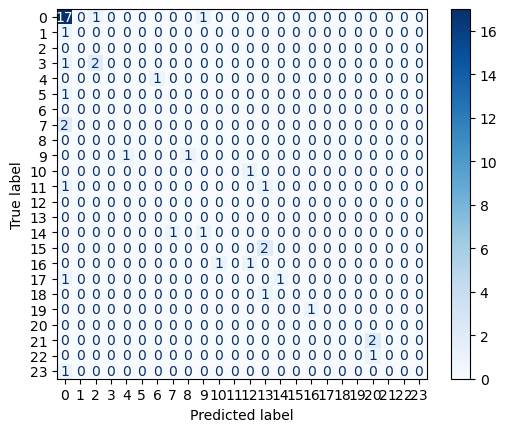

In [32]:
#Gaussian Naive Bayes
#Predicting the likelihood of a song winning with the style pop

# Filter for pop songs
pop_songs = data[data['style'].str.contains('pop', case=False)]

# Extract features and target variable
X = pop_songs.drop(columns=['final_place', 'style'])
y = pop_songs['final_place']

# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

     English       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



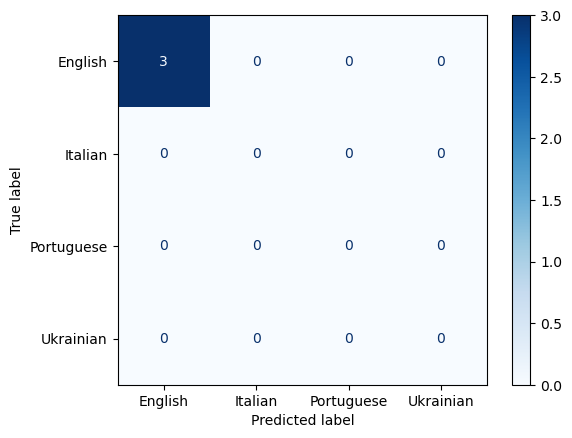

In [33]:
#Gaussian Naive Bayes
#Predicting the language of a first place song

# Filter for winning songs
winning_songs = data[data['final_place'] == 1] 

# Extract features and target variable
X = winning_songs.drop(columns=['language', 'final_place'])
y = winning_songs['language']

# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Compute the confusion matrix with all unique labels
labels = np.unique(y_train)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

      Ballad       0.00      0.00      0.00         1
       Dance       0.00      0.00      0.00         1
         Pop       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



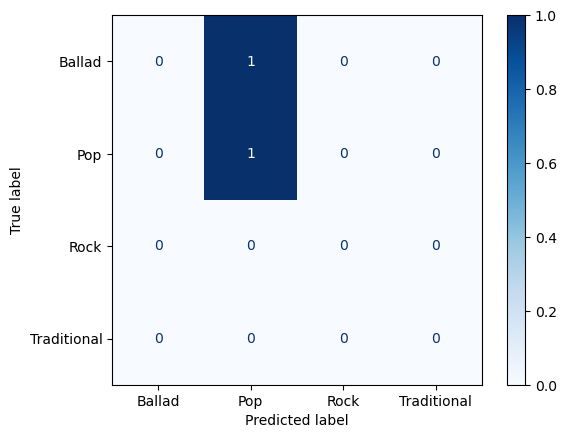

In [34]:
#Gaussian Naive Bayes
#Predicting the style of a first place song

# Filter for winning songs
winning_songs = data[data['final_place'] == 1] 

# Extract features and target variable
X = winning_songs.drop(columns=['style', 'final_place'])
y = winning_songs['style']

# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Compute the confusion matrix with all unique labels
labels = np.unique(y_train)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Accuracy: 0.4
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         4
         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        21.0       0.25      1.00      0.40         1
        23.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1

    accuracy                           0.40        10
   macro avg       0.11      0.22      0.13        10
weighted avg       0.27      0.40      0.31        10



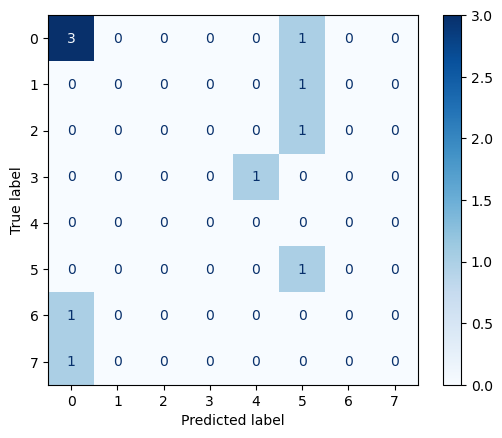

In [35]:
#Gaussian Naive Bayes
#Predicting the likelihood of a song winning with the style rock

# Filter for rock songs
rock_songs = data[data['style'].str.contains('rock', case=False)]

# Extract features and target variable
X = rock_songs.drop(columns=['final_place', 'style'])
y = rock_songs['final_place']

# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
#Bernoulli Naive Bayes
#Predicting gender

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Convert 'gender' to binary label

for i, x in enumerate(data['gender']):
    if x == "Male":
        data['gender'][i] = 0
    elif x == "Female":
        data['gender'][i] = 1
        
print(data['gender'])

# One-hot encode categorical features
categorical_features = ['country', 'language', 'style', 'key']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = encoder.fit_transform(data[categorical_features])


# Combine encoded categorical features with numerical features
numerical_features = data[['year', 'BPM', 'energy', 'final_televote_points', 'final_jury_points', 
                         'final_televote_votes', 'final_jury_votes', 'final_place', 'Total score']].values
X = pd.concat([pd.DataFrame(encoded_categorical_features), pd.DataFrame(numerical_features)], axis=1)
y = data['gender']

print("X", X)
print("y", y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = BernoulliNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

# Compute the confusion matrix with all unique labels
labels = np.unique(y_train)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

0      1
1      0
2      0
3      1
4      0
      ..
481    1
482    1
483    1
484    0
485    1
Name: gender, Length: 486, dtype: object
X       0    1    2    3    4    5    6    7    8    9   ...   91    0    1   \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2023  110   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2023  103   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2023  160   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2023  145   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2023  112   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
481  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2009    0   
482  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2009  124   
483  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2009   92   
484  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  2009  136   


C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Unknown label type: (array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 'Mix', 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 'Mix', 0, 0, 1, 1, 'Mix', 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 'Mix', 'Mix', 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 'Mix', 0, 0, 1, 1, 1, 1, 'Mix', 1, 1, 'Mix', 'Mix', 0,
       1, 1, 'Mix', 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 'Mix', 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 'Mix', 1, 'Mix', 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 'Mix', 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 'Mix', 1, 'Mix', 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 'Mix', 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 'Mix', 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 'Mix', 1, 1,
       1, 0, 0, 1, 'Mix', 1, 0, 1, 1, 'Mix', 1, 1, 'Mix', 0, 0, 'Mix', 1,
       'Mix', 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 'Mix', 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 'Mix', 'Mix',
       0, 'Mix', 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       'Mix', 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 'Mix', 0, 0,
       'Mix', 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 'Mix', 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 'Mix', 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0], dtype=object),)

In [40]:
#Bernoulli Naive Bayes
#Predicting key

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# Convert 'key' to binary label
for i, x in enumerate(data['key']):
    if x == "Minor":
        data['key'][i] = 0
    elif x == "Major":
        data['key'][i] = 1

# One-hot encode categorical features
categorical_features = ['country', 'language', 'style', 'gender']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = encoder.fit_transform(data[categorical_features])


# Combine encoded categorical features with numerical features
numerical_features = data[['year', 'BPM', 'energy', 'final_televote_points', 'final_jury_points', 
                         'final_televote_votes', 'final_jury_votes', 'final_place', 'Total score']].values
X = pd.concat([pd.DataFrame(encoded_categorical_features), pd.DataFrame(numerical_features)], axis=1)
y = data['key']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = BernoulliNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

# Compute the confusion matrix with all unique labels
labels = np.unique(y_train)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\UserA\AppData\Local\Temp\ipykernel_9624\1656945891.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key'][i] = 0
C:\Users\UserA\AppData\Local\Temp\ipykernel_9624\1656945891.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key'][i] = 1
C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [41]:
#Bernoulli Naive Bayes
#Predicting whether or not someone is a winner

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data.replace('-', pd.NA, inplace=True)
data.fillna({'country': 'unknown', 'language': 'unknown', 'style': 'unknown', 'gender': 'unknown', 'key': 'unknown', 'BPM': 0, 'energy': 0}, inplace=True)

# One-hot encode categorical features
categorical_features = ['country', 'language', 'style', 'gender']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = encoder.fit_transform(data[categorical_features])


# Combine encoded categorical features with numerical features
numerical_features = data[['year', 'BPM', 'energy', 'final_televote_points', 'final_jury_points', 
                         'final_televote_votes', 'final_jury_votes', 'key', 'Total score']].values
X = pd.concat([pd.DataFrame(encoded_categorical_features), pd.DataFrame(numerical_features)], axis=1)
y = data['final_place']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = BernoulliNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

# Compute the confusion matrix with all unique labels
labels = np.unique(y_train)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']